Activity: Structure your data

In [27]:
# Import the relevant Python libraries and modules needed in this lab.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [28]:
companies = pd.read_csv("Unicorn_Companies.csv")

Data Exploration

In [29]:
# Display the first 10 rows of the data
companies.head(10)

,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
0,Bytedance,$180B,4/7/17,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$100B,12/1/12,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100B,7/3/18,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95B,1/23/14,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,$46B,12/12/11,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita..."
5,Canva,$40B,1/8/18,Internet software & services,Surry Hills,Australia,Oceania,2012,$572M,"Sequoia Capital China, Blackbird Ventures, Mat..."
6,Checkout.com,$40B,5/2/19,Fintech,London,United Kingdom,Europe,2012,$2B,"Tiger Global Management, Insight Partners, DST..."
7,Instacart,$39B,12/30/14,"Supply chain, logistics, & delivery",San Francisco,United States,North America,2012,$3B,"Khosla Ventures, Kleiner Perkins Caufield & By..."
8,JUUL Labs,$38B,12/20/17,Consumer & retail,San Francisco,United States,North America,2015,$14B,Tiger Global Management
9,Databricks,$38B,2/5/19,Data management & analytics,San Francisco,United States,North America,2013,$3B,"Andreessen Horowitz, New Enterprise Associates..."


In [30]:
# Identify the number of rows and columns in the dataset.

companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1074 non-null   object
 1   Valuation         1074 non-null   object
 2   Date Joined       1074 non-null   object
 3   Industry          1074 non-null   object
 4   City              1058 non-null   object
 5   Country/Region    1074 non-null   object
 6   Continent         1074 non-null   object
 7   Year Founded      1074 non-null   int64 
 8   Funding           1074 non-null   object
 9   Select Investors  1073 non-null   object
dtypes: int64(1), object(9)
memory usage: 84.0+ KB


In [31]:
# Check for duplicates.

duplicates = companies.duplicated()
duplicates

companies_no_duplicates = companies.drop_duplicates()
companies.shape


(1074, 10)

In [32]:
# Display the data types of the columns.

companies.dtypes

Company             object
Valuation           object
Date Joined         object
Industry            object
City                object
Country/Region      object
Continent           object
Year Founded         int64
Funding             object
Select Investors    object
dtype: object

In [34]:
# Sort `companies` and display the first 10 rows of the resulting DataFrame.

year_sorted=companies.sort_values(by='Year Founded', ascending=True)
year_sorted.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors
189,Otto Bock HealthCare,$4B,6/24/17,Health,Duderstadt,Germany,Europe,1919,$0M,EQT Partners
373,Promasidor Holdings,$2B,11/8/16,Consumer & retail,Bryanston,South Africa,Asia,1979,$556M,"IFC, Ajinomoto"
699,Five Star Business Finance,$1B,3/26/21,Other,Chennai,India,Asia,1984,$456M,"Sequoia Capital India, Tiger Global Management..."
840,Radius Payment Solutions,$1B,11/27/17,Fintech,Crewe,United Kingdom,Europe,1990,$200M,Inflexion Private Equity
11,Epic Games,$32B,10/26/18,Other,Cary,United States,North America,1991,$7B,"Tencent Holdings, KKR, Smash Ventures"


In [35]:
# Display each unique year that occurs in the dataset
# along with the number of companies that were founded in each unique year.

companies["Year Founded"].value_counts().sort_values(ascending=False)

Year Founded
2015    155
2016    110
2014    109
2012     95
2013     87
2011     82
2017     74
2018     61
2019     45
2010     40
2009     34
2008     27
2020     25
2007     24
2006     15
2005     14
2000     11
2021     11
2001      9
2003      8
2004      8
1999      8
1998      5
2002      4
1995      2
1994      2
1991      1
1919      1
1996      1
1979      1
1992      1
1984      1
1990      1
1993      1
1997      1
Name: count, dtype: int64

Text(0.5, 1.0, 'Year Founded Histogram')

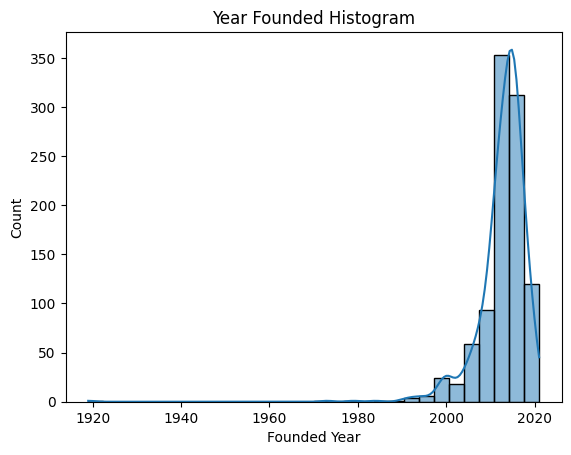

In [11]:
# Plot a histogram of the Year Founded feature.
sns.histplot(companies, x='Founded Year', bins=30, kde=True )
plt.title('Year Founded Histogram')


In [36]:
# Convert the `Date Joined` column to datetime.
# Update the column with the converted values.

# Convert the `date` column to datetime.
companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


# Display the data types of the columns in `companies`
# to confirm that the update actually took place.

companies.dtypes



/tmp/ipykernel_867036/3352356875.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  companies['Date Joined'] = pd.to_datetime(companies['Date Joined'])


Company                     object
Valuation                   object
Date Joined         datetime64[ns]
Industry                    object
City                        object
Country/Region              object
Continent                   object
Year Founded                 int64
Funding                     object
Select Investors            object
dtype: object

In [37]:
# Obtain the names of the months when companies gained unicorn status.
# Use the result to create a `Month Joined` column.
companies['Month Joined'] = companies['Date Joined'].dt.month_name()


# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December


In [38]:
# Determine how many years it took for companies to reach unicorn status.
# Use the result to create a `Years To Join` column.

companies['Years to Join']= companies['Date Joined'].dt.year - companies['Year Founded']


# Display the first few rows of `companies`
# to confirm that the new column did get added.

companies.head()


,Company,Valuation,Date Joined,Industry,City,Country/Region,Continent,Year Founded,Funding,Select Investors,Month Joined,Years to Join
0,Bytedance,$180B,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,$8B,"Sequoia Capital China, SIG Asia Investments, S...",April,5
1,SpaceX,$100B,2012-12-01,Other,Hawthorne,United States,North America,2002,$7B,"Founders Fund, Draper Fisher Jurvetson, Rothen...",December,10
2,SHEIN,$100B,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,$2B,"Tiger Global Management, Sequoia Capital China...",July,10
3,Stripe,$95B,2014-01-23,Fintech,San Francisco,United States,North America,2010,$2B,"Khosla Ventures, LowercaseCapital, capitalG",January,4
4,Klarna,$46B,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,$4B,"Institutional Venture Partners, Sequoia Capita...",December,6


In [39]:
# Filter dataset by a year of your interest (in terms of when companies reached unicorn status).
# Save the resulting subset in a new variable. 

companies_in_2021 = companies[companies['Date Joined'].dt.year == 2021]


# Display the first few rows of the subset to confirm that it was created.

companies_in_2021.head()
# After identifying the time interval that interests you, proceed with the following:
# Step 1. Take the subset that you defined for the year of interest. 

#         Insert a column that contains the time interval that each data point belongs to, as needed.
# Step 2. Group by the time interval.
#         Aggregate by counting companies that joined per interval of that year.
#         Save the resulting DataFrame in a new variable.
companies_in_2021.insert(1,'Week Joined',companies_in_2021['Date Joined'].dt.strftime('%Y-W%V'),True)

df_by_week_2021 = companies_in_2021.groupby(by="Week Joined")["Company"].count().reset_index().rename(columns={"Company":"Company Count"})



In [40]:
# Display the first few rows of the new DataFrame to confirm that it was created

df_by_week_2021.head()


,Week Joined,Company Count
0,2021-W01,12
1,2021-W02,9
2,2021-W03,5
3,2021-W04,8
4,2021-W05,4


In [41]:
#Filter additional year to create a subset that consists of companies that joined in that year.
companies_in_2020 = companies[companies['Date Joined'].dt.year == 2020]

#Concatenate that new subset with the subset that you defined previously.
df_2020_2021 = pd.concat([companies_in_2020, companies_in_2021.drop(columns="Week Joined")])

#Add a column that contains the time interval that each data point belongs to in the concatenated DataFrame.
df_2020_2021['Quarter Joined']=df_2020_2021['Date Joined'].dt.to_period('Q').dt.strftime('%Y-Q%q')

# Transform the `Valuation` column to numeric by removing `$` and `B` and casting each value to data type `float`.
df_2020_2021["Valuation"] =  df_2020_2021["Valuation"].str.strip("$B").astype(float)

# Group `companies_2020_2021` by `Quarter Joined`, 
# Aggregate by computing average `Funding` of companies that joined per quarter of each year.
# Save the resulting DataFrame in a new variable.
df_byq_2020_2021 = df_2020_2021.groupby(by="Quarter Joined")["Valuation"].mean().reset_index().rename(columns={"Valuation":"Average Valuation"})


In [42]:
# Display the first few rows of the new DataFrame to confirm that it was created.

df_byq_2020_2021.head()

,Quarter Joined,Average Valuation
0,2020-Q1,3.444444
1,2020-Q2,3.777778
2,2020-Q3,3.896552
3,2020-Q4,3.697674
4,2021-Q1,2.750000


Time to Unicorn Visualization

In [43]:
# Define a list that contains months in chronological order.

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", 
               "December"]

# Print out the list to confirm it is correct.

print(month_order)


['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


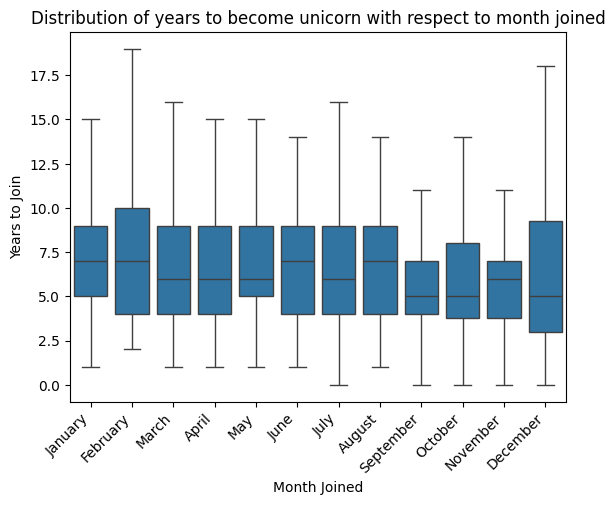

In [44]:
# Create the box plot to visualize the distribution of how long it took companies to become unicorns, with respect to the month they joined.
# Make sure the x-axis goes in chronological order by month, using the list you defined previously.
# Plot the data from the `companies` DataFrame.

sns.boxplot(x=companies['Month Joined'], 
            y=companies['Years to Join'], 
            order=month_order, 
            showfliers=False)

# Set the title of the plot.

plt.title('Distribution of years to become unicorn with respect to month joined')

# Rotate labels on the x-axis as a way to avoid overlap in the positions of the text. 

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

plt.show()


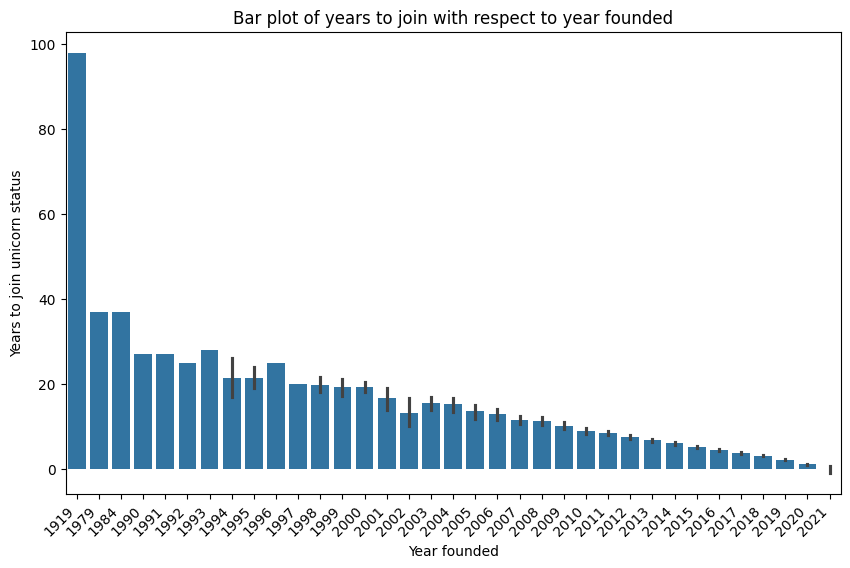

In [46]:

plt.figure(figsize=(10,6))


# Create bar plot to visualize the average number of years it took companies to reach unicorn status 
# with respect to when they were founded.
# Plot data from the `companies` DataFrame.

### YOUR CODE HERE ###

sns.barplot(x=companies["Year Founded"], y=companies["Years to Join"])


# Set title

### YOUR CODE HERE ###

plt.title("Bar plot of years to join with respect to year founded")


# Set x-axis label

### YOUR CODE HERE ###

plt.xlabel("Year founded")


# Set y-axis label

### YOUR CODE HERE ###

plt.ylabel("Years to join unicorn status")


# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  

### YOUR CODE HERE ###

plt.xticks(rotation=45, horizontalalignment='right')

# Display the plot.

### YOUR CODE HERE ###

plt.show()

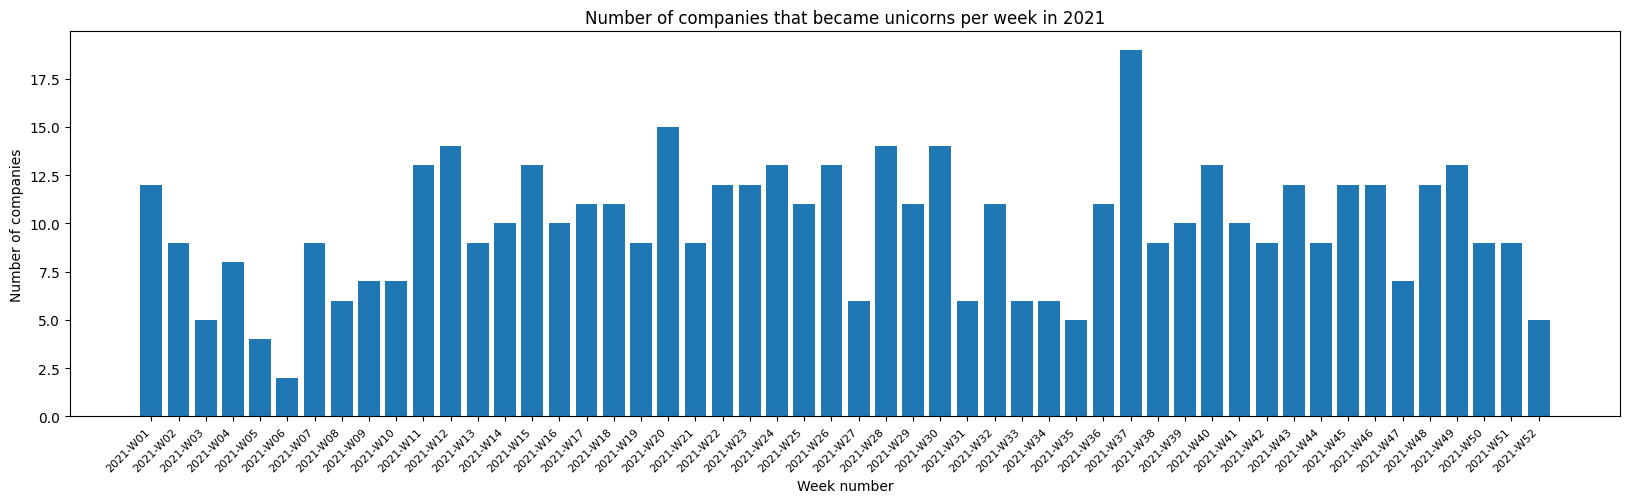

In [25]:
# Set the size of the plot.

plt.figure(figsize = (20, 5))

# Create bar plot to visualize number of companies that joined per interval for the year of interest.

plt.bar(x=df_by_week_2021['Week Joined'],height=df_by_week_2021['Company Count'])
plt.plot()

# Set the x-axis label.

plt.xlabel("Week number")

# Set the y-axis label.

plt.ylabel("Number of companies")

# Set the title.

plt.title("Number of companies that became unicorns per week in 2021")

# Rotate the labels on the x-axis as a way to avoid overlap in the positions of the text.  

plt.xticks(rotation = 45, horizontalalignment='right', fontsize=8)

# Display the plot.

plt.show()

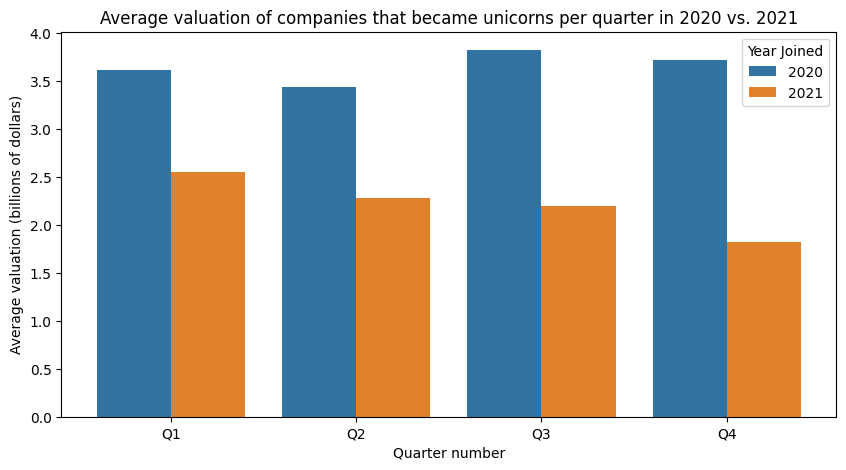

In [26]:
# Using slicing, extract the year component and the time interval that you specified, 
# and save them by adding two new columns into the subset. 

df_byq_2020_2021['Quarter Number'] =df_byq_2020_2021['Quarter Joined'].str[-2:]
df_byq_2020_2021['Year Joined'] = df_byq_2020_2021['Quarter Joined'].str[:4]

# Set the size of the plot.

plt.figure(figsize = (10, 5))

# Create a grouped bar plot.

sns.barplot(x=df_byq_2020_2021['Quarter Number'],
            y=df_byq_2020_2021['Average Valuation'],
            hue=df_byq_2020_2021['Year Joined'])
plt.plot()

# Set the x-axis label.

plt.xlabel("Quarter number")

# Set the y-axis label.

plt.ylabel("Average valuation (billions of dollars)")

# Set the title.

plt.title("Average valuation of companies that became unicorns per quarter in 2020 vs. 2021")

# Display the plot.

plt.show()

Observations from a grouped bar plot of average valuation of companies that became unicorns per quarter in 2020 vs. 2021:

In each quarter, the average valuation of companies that joined unicorn status was higher in 2020 than in 2021.
        
In 2020, Q3 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of increase from Q1 to Q2 and from Q2 to Q3.
        
In 2021, Q1 was the quarter with the highest average valuation of companies that reached unicorn status, and there was a trend of decrease across the quarters.


Potential bias:

If there were bias in terms of which cities and countries were taken into account when collecting the data, then the analysis would be more representative of the cities and countries that are in the dataset than those that are not.

If the dataset did not include certain industries, then the analysis would be more representative of the industries that are included and may not reflect trends in those that are excluded from the data.
        
If the dataset had time gaps, (e.g., if companies that joined in certain windows of time were not included in the data), then that may have affected the patterns observed, depending on how salient the gaps were.

Another point of bias pertains to the nature of time data; there have been fewer years to collect data on companies that were founded more recently than for companies that were founded longer ago.


Potential next steps with EDA:

Analyze the data with respect to industries of unicorn companies at different datetime intervals.
Analyze the data with respect to cities or countries where unicorn companies were founded at different datetime intervals.
Clean the data as needed.


Possible Questions:

How many rounds of funding did each company require and when did this funding take place?
Have any of these unicorn companies acquired other companies along the way? If so, which companies acquired other companies, which companies did they acquire, and when did the acquisitions take place?


Findings:

There are 1037 unicorn companies represented in this dataset.
2015 is the year when the most number of unicorn companies were founded.
Many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries.
The box plot created shows that companies that become unicorns in the months of September and October have a smaller median value for how long it took to become unicorns.
One of the bar plots created shows that the average valuation of companies that joined in 2020 is highest in the third quarter of the year, whereas the average valuation of companies that joined in 2021 is highest in the first quarter of the year.


Recommendations:

According to data analysis that was conducted on a dataset of 1037 unicorn companies, companies that joined in the months of September and October tended to take less time to become unicorns.

Another finding was that many of the unicorn companies that were founded in 2021 were founded in the United States and belong to "Fintech", "E-commerce & direct-to-consumer", and "Internet software & services" industries. So if the stakeholders want to invest in companies founded in 2021, it would be a good idea to consider companies that belong to these industries, as they may be strong candidates for becoming unicorns.
    
It was also discovered that the average valuation of companies that joined in 2021 is highest in the first quarter of the year, and the average valuation of companies that joined in 2020 is the third quarter of the year. When considering companies that newly join in the future, it would be worth closely looking at companies that join in the first and third quarters of the year.
    
The data can be analyzed further to gather more insights that are specific to the interests of the investing firm and the stakeholders.
